## Natural Language Processing Lesson 7 Hands-On Helper

### Import Packages 

 Note-If you get an error while importing these packages do a !pip install "package" in the cell and it will fix your error

In [1]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns

### Read in your data "Joseph and his Brothers"

In [7]:
url = 'https://www.gutenberg.org/cache/epub/66884/pg66884-images.html'
r = requests.get(url)

In [8]:
type(r)

requests.models.Response

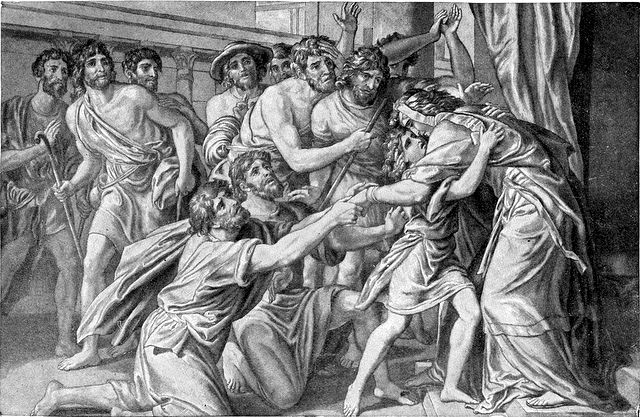

In [14]:
from IPython.display import Image
Image('http://lavistachurchofchrist.org/Pictures/Treasures%20of%20the%20Bible%20(Genesis)/images/scan0033.jpg')

### Converting your text to soup

In [9]:
html = r.text
soup = BeautifulSoup(html,"html.parser")
type(soup)

bs4.BeautifulSoup

### Use HTML Tags to Extract Useful Info


In [10]:
soup.title.string

'Joseph and his Brethren'

### Tokenize Data

The following code uses the function get_text() to retrieve your text, and then you will use the function RegexpTokenizer() to break it down into words, separated by spaces. Spaces, you might ask? Well, in the language RegEx, \w+ is the symbol for space.

Then the function tokenize() will actually perform the operation, and you will get the first five words with [:5]:

In [11]:
text = soup.get_text()
tokenizer = RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(text)
tokens[:5]

['Joseph', 'and', 'his', 'Brethren', 'The']

### Remove Capitalization


The above code uses a for loop, and makes use of the function lower() to strip caps. It all goes into a dictionary named words. You can take a look at the first five entries in the dictionary like this:

In [12]:
words = []
for word in tokens:
    words.append(word.lower())

In [13]:
words[:5]

['joseph', 'and', 'his', 'brethren', 'the']

### Remove Stopwords

These are words that do nothing for your analysis. It's best to get them out of the way! 

Note you may need to import nltk-
nltk.download('stopwords') before running the code below.

In [17]:
stopwords = nltk.corpus.stopwords.words('english')

First 10 words

In [18]:
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

The above words do not contain any emotion or valuable information for your analysis, so you need to remove them.

In [19]:
wordsWithoutStops = []
for word in words:
    if word not in stopwords:
        wordsWithoutStops.append(word)

Let's check again to see if they were removed..

In [20]:
wordsWithoutStops[:5]

['joseph', 'brethren', 'project', 'gutenberg', 'ebook']

Yes, great job!

### Count and Plot Words

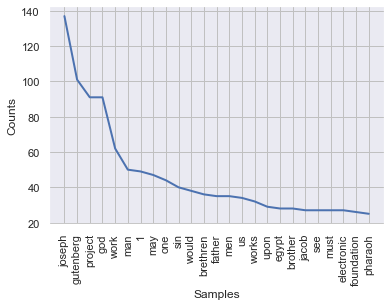

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [21]:
sns.set()
frequencyDis = nltk.FreqDist(wordsWithoutStops)
frequencyDis.plot(25)